In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load the dataset
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
# Display basic information about the dataset
print("Dataset shape: ", df.shape)
print("Columns: ", df.columns)
df.head()

Dataset shape:  (1190, 12)
Columns:  Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


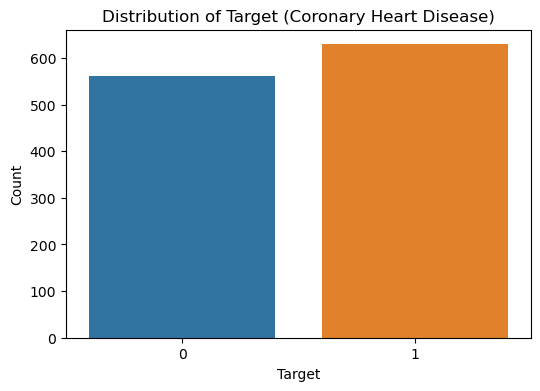

In [5]:
# Checking if 'target' column exists, adjust if necessary
if 'target' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='target', data=df)
    plt.title("Distribution of Target (Coronary Heart Disease)")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.show()
else:
    print("Target column not found. Please check the column names.")


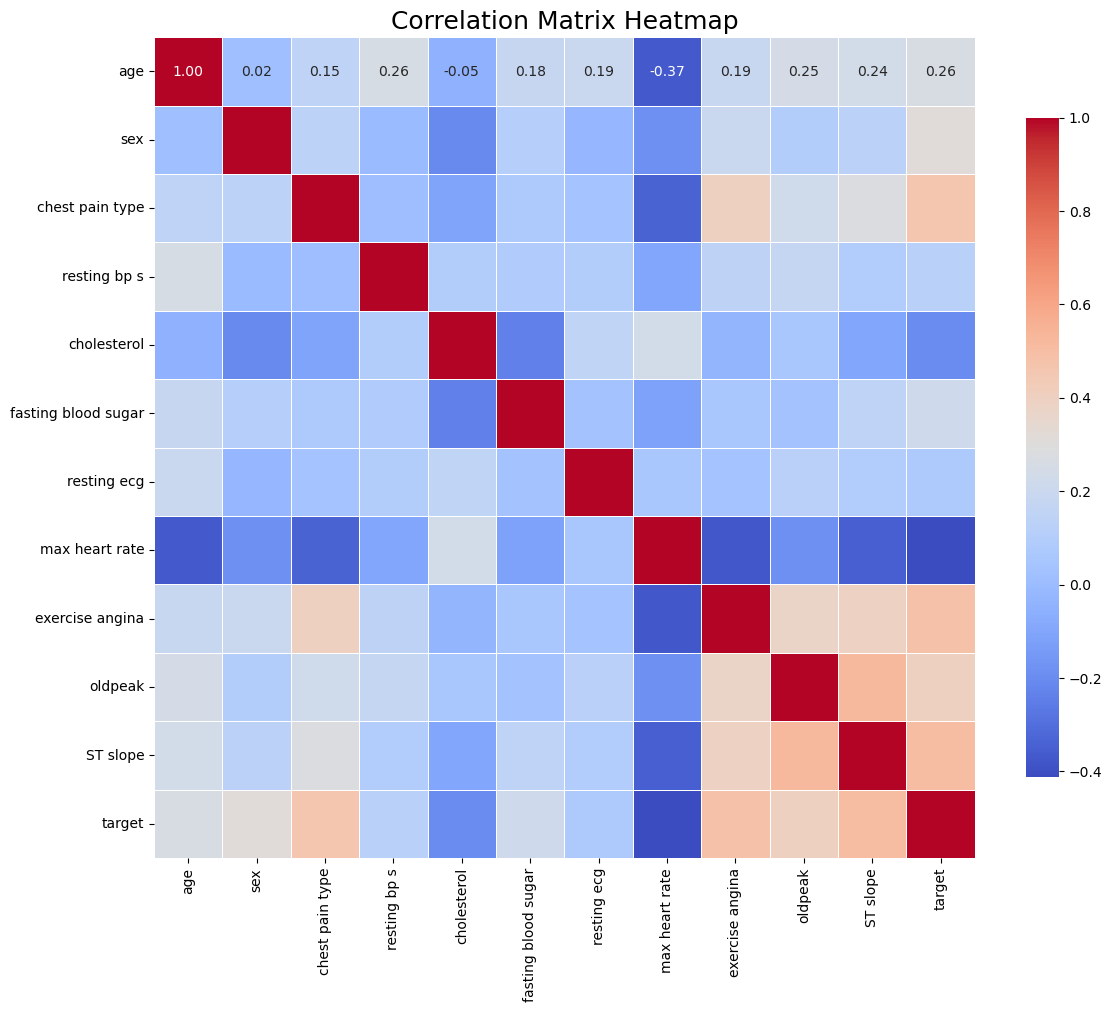

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv('path_to_your_dataset.csv')  # Uncomment and specify your dataset path

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with annotations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8}, 
            annot_kws={"size": 10}, 
            square=True)

# Add title and adjust layout
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
# Separating features and target
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


Training data shape:  (952, 11)
Testing data shape:  (238, 11)


In [8]:
import keras
print(keras.__version__)

3.3.3


In [19]:
# Separating features and target
X = df.drop(columns=['target'])  # Assuming 'target' is the label column
y = df['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)


Training data shape:  (952, 11)
Testing data shape:  (238, 11)


In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout

# Reshaping for CNN (assuming data has more than one feature, CNN expects 3D input)
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# CNN Model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=0, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

C:\Users\Hrutuja\Documents\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6236 - loss: 0.6600 - val_accuracy: 0.7353 - val_loss: 0.5818
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7590 - loss: 0.5540 - val_accuracy: 0.7899 - val_loss: 0.4951
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8025 - loss: 0.4811 - val_accuracy: 0.8025 - val_loss: 0.4477
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8007 - loss: 0.4720 - val_accuracy: 0.8235 - val_loss: 0.4339
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8030 - loss: 0.4365 - val_accuracy: 0.7941 - val_loss: 0.4255
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8599 - loss: 0.3786 - val_accuracy: 0.8193 - val_loss: 0.4310
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8314 - loss: 0.3994 - val_accuracy: 0.8193 - val_loss: 0.4207
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8227 - loss: 0.4259 - val_accuracy: 0.8151 - val_

In [15]:
print("Original shape of X_train:", X_train.shape)

Original shape of X_train: (952, 1, 11)


In [16]:
#n_samples = X_train.shape[0]  # number of samples
n_features = X_train.shape[1]  # number of features
timesteps = 1  # set this to 1 for standard feature input


In [21]:
from tensorflow.keras.layers import SimpleRNN

# Reshaping for RNN (3D input)
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

# RNN Model
rnn_model = Sequential([
    SimpleRNN(64, input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
    SimpleRNN(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the RNN model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f"RNN Test Accuracy: {rnn_accuracy * 100:.2f}%")


C:\Users\Hrutuja\Documents\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - accuracy: 0.6978 - loss: 0.5571 - val_accuracy: 0.8529 - val_loss: 0.3831
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7995 - loss: 0.4106 - val_accuracy: 0.8655 - val_loss: 0.3778
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8567 - loss: 0.3495 - val_accuracy: 0.8445 - val_loss: 0.3657
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8201 - loss: 0.3847 - val_accuracy: 0.8571 - val_loss: 0.3631
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8617 - loss: 0.3386 - val_accuracy: 0.8655 - val_loss: 0.3596
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8428 - loss: 0.3458 - val_accuracy: 0.8529 - val_loss: 0.3292
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8577 - loss: 0.3485 - val_accuracy: 0.8739 - val_loss: 0.3276
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8769 - loss: 0.3203 - val_accuracy: 0.8361 - 

In [27]:
from tensorflow.keras.layers import LSTM

# LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_rnn, y_test)
print(f"LSTM Test Accuracy: {lstm_accuracy * 100:.2f}%")


C:\Users\Hrutuja\Documents\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.6631 - loss: 0.6620 - val_accuracy: 0.6933 - val_loss: 0.5720
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7331 - loss: 0.5303 - val_accuracy: 0.6891 - val_loss: 0.5580
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7248 - loss: 0.5376 - val_accuracy: 0.6933 - val_loss: 0.5506
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7277 - loss: 0.5204 - val_accuracy: 0.7269 - val_loss: 0.5339
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7212 - loss: 0.5433 - val_accuracy: 0.7437 - val_loss: 0.5020
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7532 - loss: 0.4839 - val_accuracy: 0.7815 - val_loss: 0.4753
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7955 - loss: 0.4807 - val_accuracy: 0.7857 - val_loss: 0.4634
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7977 - loss: 0.4550 - val_accuracy: 0.7857 - 

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape (modify this according to your data)
input_shape = (X_train.shape[1],)  # Assuming X_train is 2D: (num_samples, num_features)

# Input layer
inputs = tf.keras.Input(shape=input_shape)

# Reshape the inputs to 3D for attention
reshaped_inputs = layers.Reshape((1, input_shape[0]))(inputs)

# Add a Dense layer
dense_1 = layers.Dense(64, activation='relu')(reshaped_inputs)

# Attention layer requires a 3D input: (batch_size, time_steps, features)
attention_output = layers.Attention()([dense_1, dense_1])

# Flatten the output after attention (convert back to 2D)
flattened_output = layers.Flatten()(attention_output)

# Add a few Dense layers
dense_2 = layers.Dense(64, activation='relu')(flattened_output)
dense_3 = layers.Dense(32, activation='relu')(dense_2)

# Output layer (Binary classification for coronary heart disease)
outputs = layers.Dense(1, activation='sigmoid')(dense_3)

# Create the model
attention_model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to check structure
attention_model.summary()

# Train the Attention-based DNN model
attention_history = attention_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Attention-based DNN model
attention_loss, attention_accuracy = attention_model.evaluate(X_test, y_test)

print(f"Attention-based DNN Accuracy: {attention_accuracy * 100:.2f}%")


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 11)     │          0 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1, 64)     │        768 │ reshape[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 1, 64)     │          0 │ dense_8[0][0],    │
│ (Attention)         │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 64)        │          0 │ attention[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 64)        │      4,160 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      2,080 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         33 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,041 (27.50 KB)

 Trainable params: 7,041 (27.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


C:\Users\Hrutuja\Documents\Anaconda\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6836 - loss: 0.6171 - val_accuracy: 0.8193 - val_loss: 0.4446
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8270 - loss: 0.4149 - val_accuracy: 0.8445 - val_loss: 0.3760
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8600 - loss: 0.3409 - val_accuracy: 0.8487 - val_loss: 0.3659
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8580 - loss: 0.3383 - val_accuracy: 0.8445 - val_loss: 0.3647
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8775 - loss: 0.3012 - val_accuracy: 0.8571 - val_loss: 0.3439
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8792 - loss: 0.3040 - val_accuracy: 0.8697 - val_loss: 0.3405
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8954 - loss: 0.2859 - val_accuracy: 0.8782 - val_loss: 0.3288
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9006 - loss: 0.2595 - val_accuracy: 0.8782 - val_loss: 0.3283
Ep

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Generator model
def build_generator(latent_dim, num_classes):
    input_label = layers.Input(shape=(1,), dtype='int32')  # Label input
    input_latent = layers.Input(shape=(latent_dim,))  # Latent space input

    # Embedding the label into a dense representation
    label_embedding = layers.Embedding(num_classes, latent_dim)(input_label)
    label_embedding = layers.Flatten()(label_embedding)

    # Merging the label with the latent input
    merged_input = layers.multiply([input_latent, label_embedding])

    # Build the generator network
    x = layers.Dense(128)(merged_input)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    x = layers.Dense(256)(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    x = layers.Dense(512)(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    
    # Output layer
    output = layers.Dense(28*28*1, activation='tanh')(x)  # Assuming image size 28x28 (MNIST example)
    output = layers.Reshape((28, 28, 1))(output)

    model = models.Model([input_latent, input_label], output)
    return model

# Discriminator model
def build_discriminator(num_classes):
    input_image = layers.Input(shape=(28, 28, 1))  # Assuming image size 28x28 (MNIST example)
    input_label = layers.Input(shape=(1,), dtype='int32')  # Label input

    # Embedding the label and reshaping it to match the image shape
    label_embedding = layers.Embedding(num_classes, np.prod((28, 28)))(input_label)
    label_embedding = layers.Flatten()(label_embedding)
    label_embedding = layers.Reshape((28, 28, 1))(label_embedding)

    # Merging the label with the image
    merged_input = layers.Concatenate()([input_image, label_embedding])

    # Build the discriminator network
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding='same')(merged_input)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128)(x)
    x = layers.LeakyReLU(negative_slope=0.2)(x)

    # Output layer: Probability that input is real/fake
    output = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model([input_image, input_label], output)
    return model

# Building and compiling the GAN
def build_cac_gan(generator, discriminator):
    # Set discriminator as non-trainable when training the generator
    discriminator.trainable = False
    
    # Inputs for the GAN model
    latent_dim = generator.input[0].shape[-1]
    num_classes = generator.input[1].shape[-1]

    input_latent = layers.Input(shape=(latent_dim,))
    input_label = layers.Input(shape=(1,))

    # Generate an image
    generated_image = generator([input_latent, input_label])

    # Get the discriminator's output for the generated image
    gan_output = discriminator([generated_image, input_label])

    # Compile the GAN model
    gan_model = models.Model([input_latent, input_label], gan_output)
    gan_model.compile(optimizer='adam', loss='binary_crossentropy')

    return gan_model

# Parameters
latent_dim = 100
num_classes = 10  # Modify according to your dataset

# Build generator and discriminator
generator = build_generator(latent_dim, num_classes)
discriminator = build_discriminator(num_classes)

# Compile discriminator separately
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Build and compile the CAC-GAN model
cac_gan = build_cac_gan(generator, discriminator)

# Print model summaries
print("Generator Summary:")
generator.summary()
print("\nDiscriminator Summary:")
discriminator.summary()
print("\nCAC-GAN Summary:")
cac_gan.summary()

Generator Summary:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1, 100)    │      1,000 │ input_layer_5[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_6       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 100)       │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 100)       │          0 │ input_layer_6[0]… │
│                     │                   │            │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │     12,928 │ multiply[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 128)       │          0 │ dense_12[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 256)       │     33,024 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 256)       │          0 │ dense_13[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 512)       │    131,584 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 512)       │          0 │ dense_14[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 1024)      │    525,312 │ leaky_re_lu_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 1024)      │          0 │ dense_15[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 784)       │    803,600 │ leaky_re_lu_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 28, 28, 1) │          0 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,507,448 (5.75 MB)

 Trainable params: 1,507,448 (5.75 MB)

 Non-trainable params: 0 (0.00 B)


Discriminator Summary:


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 784)    │      7,840 │ input_layer_8[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 784)       │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_7       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_2 (Reshape) │ (None, 28, 28, 1) │          0 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 28, 2) │          0 │ input_layer_7[0]… │
│ (Concatenate)       │                   │            │ reshape_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │      1,216 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 14, 14,    │          0 │ conv2d[0][0]      │
│ (LeakyReLU)         │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 128) │     73,856 │ leaky_re_lu_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 7, 7, 128) │          0 │ conv2d_1[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 6272)      │          0 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128)       │    802,944 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 128)       │          0 │ dense_17[0][0]    │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 1)         │        129 │ leaky_re_lu_6[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 885,985 (3.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 885,985 (3.38 MB)


CAC-GAN Summary:


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_10      │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_6        │ (None, 28, 28, 1) │  1,507,448 │ input_layer_9[0]… │
│ (Functional)        │                   │            │ input_layer_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_8        │ (None, 1)         │    885,985 │ functional_6[0][… │
│ (Functional)        │                   │            │ input_layer_10[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,393,433 (9.13 MB)

 Trainable params: 1,507,448 (5.75 MB)

 Non-trainable params: 885,985 (3.38 MB)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# CNN evaluation
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")
print("CNN Classification Report:\n", classification_report(y_test, y_pred_cnn))

# RNN evaluation
y_pred_rnn = (rnn_model.predict(X_test_rnn) > 0.5).astype("int32")
print("RNN Classification Report:\n", classification_report(y_test, y_pred_rnn))

# LSTM evaluation
y_pred_lstm = (lstm_model.predict(X_test_rnn) > 0.5).astype("int32")
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

# Attention-based DNN evaluation
y_pred_attention = (attention_model.predict(X_test) > 0.5).astype("int32")
print("Attention DNN Classification Report:\n", classification_report(y_test, y_pred_attention))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       112
           1       0.83      0.81      0.82       126

    accuracy                           0.81       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.81      0.81       238

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RNN Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       112
           1       0.90      0.89      0.90       126

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       112
           1       0.82      0.84    

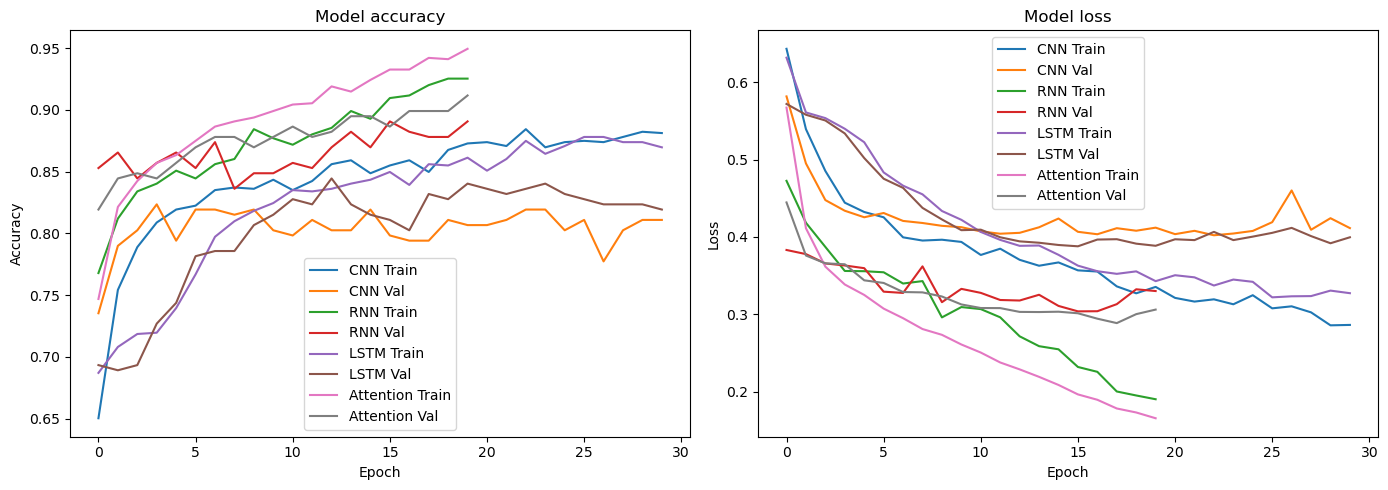

In [29]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss
def plot_model_history(histories, model_names):
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['accuracy'], label=f'{name} Train')
        plt.plot(history.history['val_accuracy'], label=f'{name} Val')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=f'{name} Train')
        plt.plot(history.history['val_loss'], label=f'{name} Val')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# List of model histories and names
histories = [cnn_history, rnn_history, lstm_history, attention_history]
model_names = ['CNN', 'RNN', 'LSTM', 'Attention']

# Plot the model histories
plot_model_history(histories, model_names)